In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Flatten #Dense간의 모든 결합시 계산을 간단하게 하기 위한 객체

In [5]:
input_ar = np.arange(1,13).reshape(3,2,2)
print('input_ar shape : ',input_ar.shape)

res = input_ar.reshape(1,2,2,3)
print(res)

f_res=Flatten(data_format=None)
f_res

out_res = f_res(res)
print(f'shape={out_res.shape}')
print(out_res)

input_ar shape :  (3, 2, 2)
[[[[ 1  2  3]
   [ 4  5  6]]

  [[ 7  8  9]
   [10 11 12]]]]
shape=(1, 12)
tf.Tensor([[ 1  2  3  4  5  6  7  8  9 10 11 12]], shape=(1, 12), dtype=int32)


### Q2) 단일 레이어를 구현해보자

In [7]:
from tensorflow.keras.layers import MaxPooling2D
input_ar = np.arange(-10,-1).reshape(3,3)
input_ar

array([[-10,  -9,  -8],
       [ -7,  -6,  -5],
       [ -4,  -3,  -2]])

In [14]:
#2 3*3 2차원 배열을 케라스 모델용 4차원 배열로 변환
input_ar = input_ar.reshape(1,3,3,1)


#3 단위레이어 Maxpooling2D를 구현해 보자.
maxpool = MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same') #padding = 'same' : 상화 좌우 제로 패딩

out_res = maxpool(input_ar)

print(f'shape = {out_res.shape}')
print(out_res)

#텐서를 numpy 배열로 변환해서 출력 해보자 
out_np = out_res.numpy().reshape(2,2)
print(out_np.shape)

shape = (1, 2, 2, 1)
tf.Tensor(
[[[[-6]
   [-5]]

  [[-3]
   [-2]]]], shape=(1, 2, 2, 1), dtype=int32)
(2, 2)


In [22]:

input_metrix = tf.constant([[12,20,30,0],
                            [8,12,2,0],
                            [34,70,37,4],
                            [112,100,25,12]],dtype = tf.float32)

#reshape(batch_size 하나의 이미지 1 , height,width,channels) #흑백 채널의 단일 채널 데이터
input_matrix_reshaped = tf.reshape(input_metrix,[1,4,4,1]) #4차원 텐서

max_pool = MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid')
max_pool_output = max_pool(input_matrix_reshaped)

print(max_pool_output.numpy().reshape(2,2))

[[ 20.  30.]
 [112.  37.]]


In [32]:
input_metrix.shape

TensorShape([4, 4])

In [23]:
from tensorflow.keras.layers import AveragePooling2D

max_pool = AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid')
max_pool_output = max_pool(input_matrix_reshaped)

print(max_pool_output.numpy().reshape(2,2))

[[13.   8. ]
 [79.  19.5]]


In [26]:
from tensorflow.keras.layers import GlobalMaxPooling2D


max_pool = GlobalMaxPooling2D()
max_pool_output = max_pool(input_matrix_reshaped)

print(max_pool_output.numpy())

[[112.]]


In [28]:
from tensorflow.keras.layers import GlobalAveragePooling2D

glob_avg_pool = GlobalAveragePooling2D()
max_pool_output = glob_avg_pool(input_matrix_reshaped)

print(max_pool_output.numpy())

[[29.875]]


### Q3)의 코드를 적용해서 'img/apple.jpg'를 서브샘플링 해보자

In [79]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
import cv2

img = cv2.imread('img/apple.jpg',0)
#height, width = img.shape[:2]
img = cv2.resize(img,(4,4)) # w,h

input_metrix = tf.constant(resize_img,dtype = tf.float32)

input_matrix_reshaped = tf.reshape(input_metrix,[1,4,4,1])

max_pool = MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid')
max_pool_output = max_pool(input_matrix_reshaped)

print(max_pool_output.numpy().reshape(2,2))

glob_max_pool = GlobalMaxPooling2D()
glob_max_pool_output = glob_max_pool(input_matrix_reshaped)

avg_pool = AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid')
avg_pool_output = avg_pool(input_matrix_reshaped)

[[228. 253.]
 [253.  99.]]


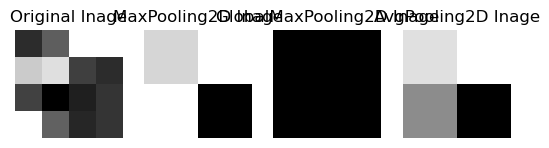

In [81]:
import matplotlib.pyplot as plt

plt.subplot(1,4,1)
plt.title('Original Inage')
plt.imshow(img,cmap='gray')
plt.axis('off')

plt.subplot(1,4,2)
plt.title('MaxPooling2D Inage')
plt.imshow(tf.squeeze(max_pool_output),cmap='gray') #차원이 4차원인 내용을 2차원 줄인다
plt.axis('off')

plt.subplot(1,4,3)
plt.title('GlobalMaxPooling2D Inage')
plt.imshow(glob_max_pool_output,cmap='gray') #차원이 4차원인 내용을 2차원 줄인다
plt.axis('off')

plt.subplot(1,4,4)
plt.title('AvgPooling2D Inage')
plt.imshow(tf.squeeze(avg_pool_output),cmap='gray') #차원이 4차원인 내용을 2차원 줄인다
plt.axis('off')

plt.show()
#tf.squeeze() 데이터 차원 간소화 , 모델에서 출력층,중간층의 결과 처리

### Q5) Conv2D 단일레이어 추가해보자

In [115]:
input_metrix.shape

TensorShape([4, 4])

In [103]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Conv2D
import cv2

input_metrix = tf.constant([[12,20,30,0],
                            [8,12,2,0],
                            [34,70,37,4],
                            [112,100,25,12]],dtype = tf.float32)
#reshape(batch_size 하나의 이미지 1 , height,width,channels) #흑백 채널의 단일 채널 데이터
input_matrix_reshaped = tf.reshape(input_metrix,[1,4,4,1]) #4차원 텐서

#Conv2D 적용
conv_2d = Conv2D( 
    filters = 1, #출력의 차원 수
    kernel_size=(2,2), #필터 크기 -> 컨볼루션에 사용
    strides=(2, 2),
    padding='same', #입,출력 이미지와 동일한 크기를 가지도록 주변 패딩을 주겠다.   
    activation=None,
    use_bias=False,
    kernel_initializer='ones'  #커널의 초기 값을 모두 1로 지정하곘다.
    )
out_res = conv_2d(input_matrix_reshaped)
print(out_res.shape)
print(out_res) #kernel_size = (2,2) 입력 데이터의 각 2*2 패치의 합을 계산

max_pool = MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='valid')
max_pool_output = max_pool(out_res)

print('----------MaxPooling2D--------------------')
print(max_pool_output.shape)
print(max_pool_output.numpy().reshape(-1)) 

#padding = 'valid' 입력데이터 크기가 폴링윈도우 크기로 나누어서 떨어지지 않을 경우
# 폴링 윈도우가 완전히 맞지 않은 마지막 부분은 무신된다
# 추가적인 패딩은 사용되지 않고, 입력 데이터의 실제 경계 내에서만 폴링 연산 수행하곘다

(1, 2, 2, 1)
tf.Tensor(
[[[[ 52.]
   [ 32.]]

  [[316.]
   [ 78.]]]], shape=(1, 2, 2, 1), dtype=float32)
----------MaxPooling2D--------------------
(1, 1, 1, 1)
[316.]


In [97]:
a= np.array([[12,20],
             [8,12]
            ])

b= np.array([[1,1],
             [1,1]
            ])

c = a* b
print(c) #합 52

[[12 20]
 [ 8 12]]


### Q6) CNN pdf 4 코드 작성해 보자
Conv2D,Dense 파라미터 수
- Conv2D : (kernel_height * kernel_weight * input_channes + 1) * filters(+1 바이어스)
- Dense : (input_units +1) * output_units (+1 바이어스)

In [108]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [113]:
model = Sequential()

#12필터, 각필터 크기 5*5, 음수를 0, 120*60 사이즈 채널 1
# (5*5*1+1)*12 = 312 파라미터
model.add(Conv2D(12,kernel_size=(5,5),activation = 'relu',input_shape=(120,60,1))) 
model.add(MaxPooling2D(pool_size=(2,2))) #특징 맵 크기는 축소

# (5*5*12+1)*16  = 4816파라미터 (이전의 레이어의 필터 수가 입력 채널 수로 사용된다)
model.add(Conv2D(16,kernel_size=(5,5),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #특징 맵 크기는 축소

# (4*4*16+1)*20  = 5140파라미터
model.add(Conv2D(20,kernel_size=(4,4),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #특징 맵 크기는 축소

model.add(Flatten()) #이전 레이어의 특징맵을 1차원 벡터로 변환
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [114]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 116, 56, 12)       312       
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 58, 28, 12)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 54, 24, 16)        4816      
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 27, 12, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 24, 9, 20)         5140      
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 12, 4, 20)        